# Telco Customer Churn Analysis
By Tawakalt Bisola Okunola

## Summary of Dataset
The Telco Customer Churn dataset provides a comprehensive view of customer behavior within a telecommunications company, focusing on the factors that influence whether a customer decides to leave the service (churn). Each row in the dataset corresponds to an individual customer, while each column contains specific attributes related to that customer, categorized into several key areas:


1. **Churn Status**:
   - The dataset identifies customers who have left the company within the last month. This information is captured in the `Churn` column, which serves as the primary label for predictive analysis.

2. **Customer Services**:
   - This section details the various services that customers have subscribed to, including:
     - **Phone Services**: Basic phone service and multiple lines.
     - **Internet Services**: Includes options like online security, online backup, device protection, and technical support.
     - **Entertainment**: Subscription to streaming TV and movies.

3. **Account Information**:
   - This area captures the financial and contractual aspects of the customer’s relationship with the company, including:
     - **Tenure**: Duration of the customer's relationship with the company.
     - **Contract Type**: Information on whether the customer is on a month-to-month contract, a one-year contract, or a two-year contract.
     - **Payment Method**: How the customer pays their bill, such as electronic check, mailed check, bank transfer, or credit card.
     - **Billing Details**: Includes whether the customer uses paperless billing, the monthly charges they incur, and their total charges to date.

4. **Demographic Information**:
   - This section includes basic demographic details of the customers, such as:
     - **Gender**: The gender of the customer.
     - **Age Range**: Information about whether the customer falls within a senior age category.
     - **Family Information**: Whether the customer has a partner and/or dependents.

## Data Loading and Cleaning
The data was imported into a PostgreSQL database and subsequently cleaned using [SQL queries](sql_load).



## Data Visualizations

Data visualizations were created by executing SQL queries to extract the necessary values and insights. These were then visualized using Pandas, NumPy, and mpl_toolkits.mplot3d, based on the CSV files generated from the [SQL queries](project_sql).

In [31]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d
import numpy as np

### Summary of Churn Insights


**Customer Distribution**:
  - **Non-Churned Customers**: There are 5,174 customers who have not churned, representing about 73.5% of the total customer base.
  - **Churned Customers**: A total of 1,869 customers have churned, which accounts for 26.5% of the customer base.

**Churn Rate**:
  - The churn rate is 26.5%, meaning just over a quarter of the customers have left the service.
  - Conversely, 73.5% of customers have stayed with the service.

### Implications:

- The churn rate of 26.5% indicates a significant portion of the customer base is leaving, which could signal underlying issues with customer satisfaction, competition, or service offerings.
- Retention strategies could be essential to target the 26.5% of customers who are at risk of churning, potentially focusing on service improvements, customer engagement, and tailored offerings to meet customer needs.

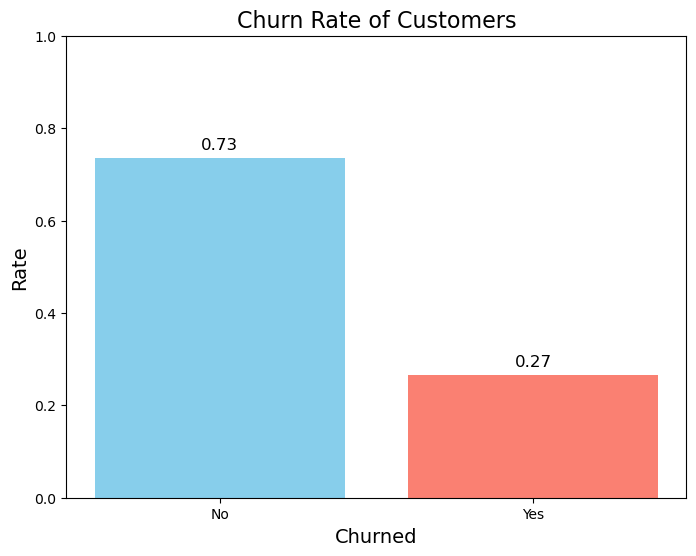

In [44]:
# Loading csv
file_path = 'analysis_files/churn_rate.csv'
churn_data = pd.read_csv(file_path)

# Plotting the churn rate
plt.figure(figsize=(8, 6))
plt.bar(churn_data['churned'], churn_data['rate'], color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Churn Rate of Customers', fontsize=16)
plt.xlabel('Churned', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.ylim(0, 1)

# Adding text labels on the bars
for index, value in enumerate(churn_data['rate']):
  plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

# Display the plot
plt.show()


### Summary of Contract Churn Insights

**Churn Rate Analysis**:
  - **Month-to-Month Contracts** have the highest churn rate at 42.71%, indicating that customers with flexible, short-term contracts are more likely to leave the service.
  - **One-Year Contracts** have a significantly lower churn rate of 11.27%, suggesting better retention compared to month-to-month contracts.
  - **Two-Year Contracts** exhibit the lowest churn rate at 2.83%, indicating that customers with longer-term commitments are the least likely to churn.

### Implications:

- The high churn rate among month-to-month contract customers suggests a need for strategies to increase engagement and loyalty for this segment, potentially by offering incentives or discounts for switching to longer-term contracts.
- The lower churn rates associated with one-year and two-year contracts imply that long-term commitments help retain customers. Offering attractive terms for these contracts could further reduce churn.
- Understanding the reasons behind the high churn rate for month-to-month customers (e.g., dissatisfaction, competitive offers, lack of commitment) could inform targeted interventions to improve retention.

There is a strong correlation between contract length and customer retention, with longer contracts resulting in significantly lower churn rates.

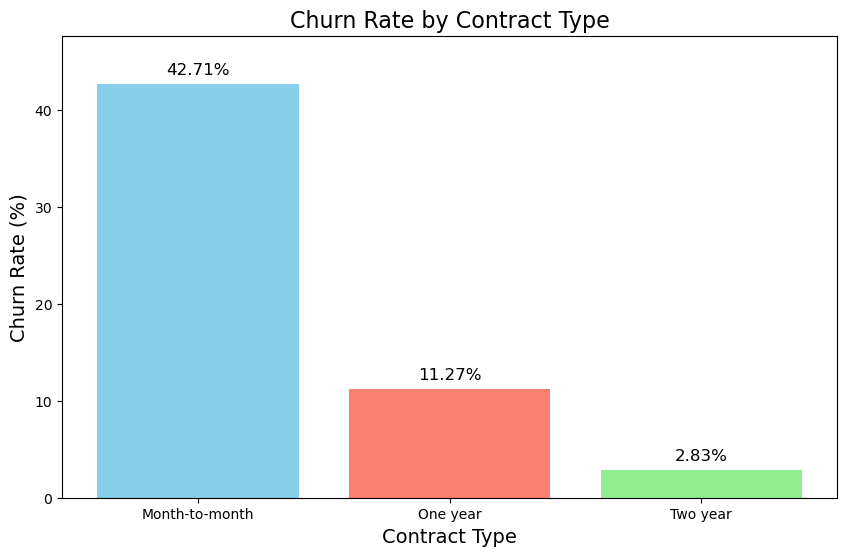

In [34]:
# Loading csv
file_path = 'analysis_files/contract_churn_rate.csv'
contract_churn_data = pd.read_csv(file_path)

# Plotting churn rate by contract type
plt.figure(figsize=(10, 6))
plt.bar(contract_churn_data['contract'], contract_churn_data['churn_rate'], color=['skyblue', 'salmon', 'lightgreen'])

# Adding title and labels
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(contract_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(contract_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()



### Phone Service and Churn
- **With Phone Service**: Customers with phone service have a higher churn rate compared to those without, indicating potential dissatisfaction with the phone service.
- **Without Phone Service**: While still high, the churn rate for customers without phone service is slightly lower than those with phone service.


### Internet Service and Churn
- **Fiber Optic**: Fiber optic service has the highest churn rate, indicating potential issues with service quality, pricing, or customer satisfaction.
- **DSL**: has a moderate churn rate, suggesting it may be more stable or satisfactory compared to fiber optic.
- **No Internet Service**: Customers without internet service have the lowest churn rate, possibly due to fewer service-related issues.


### Combined Insights
- **Fiber Optic with Phone Service**: The combination of fiber optic and phone service has the highest churn rate, suggesting significant issues that need addressing.
- **DSL with Phone Service**: This combination has a lower churn rate compared to fiber optic, indicating better customer retention.
- **DSL without Phone Service**: Higher churn rate compared to DSL with phone service, suggesting phone service might be a retention factor for DSL customers.
- **No Internet with Phone Service**: The lowest churn rate, indicating high satisfaction or fewer issues.

###

The data indicates that `fiber optic service` has the highest churn rate, especially when combined with phone service. `DSL` shows a moderate churn rate, with better retention when phone service is included. Customers without internet service have the lowest churn rate, suggesting fewer service-related issues. Addressing the factors contributing to high churn rates in fiber optic and phone services could significantly improve customer retention.


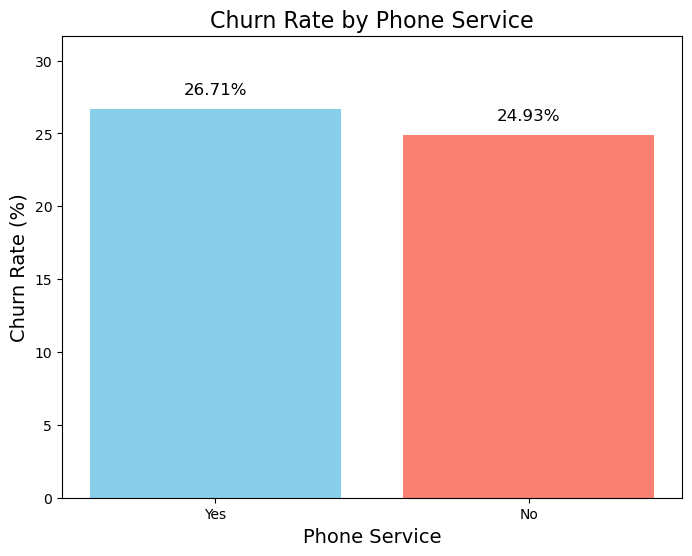

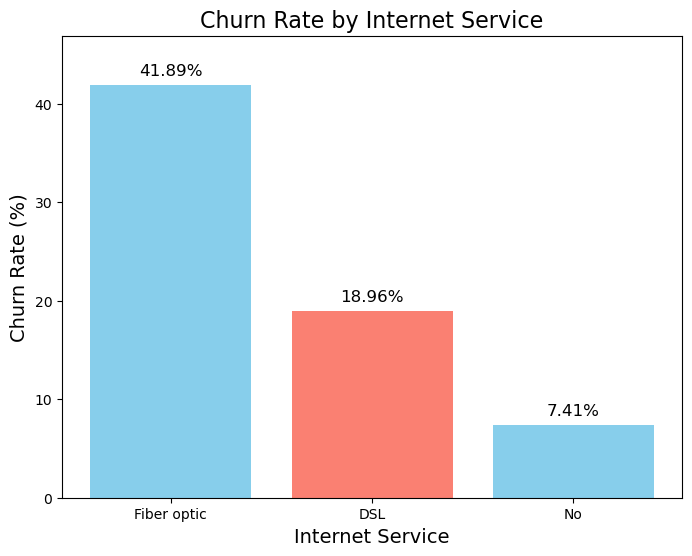

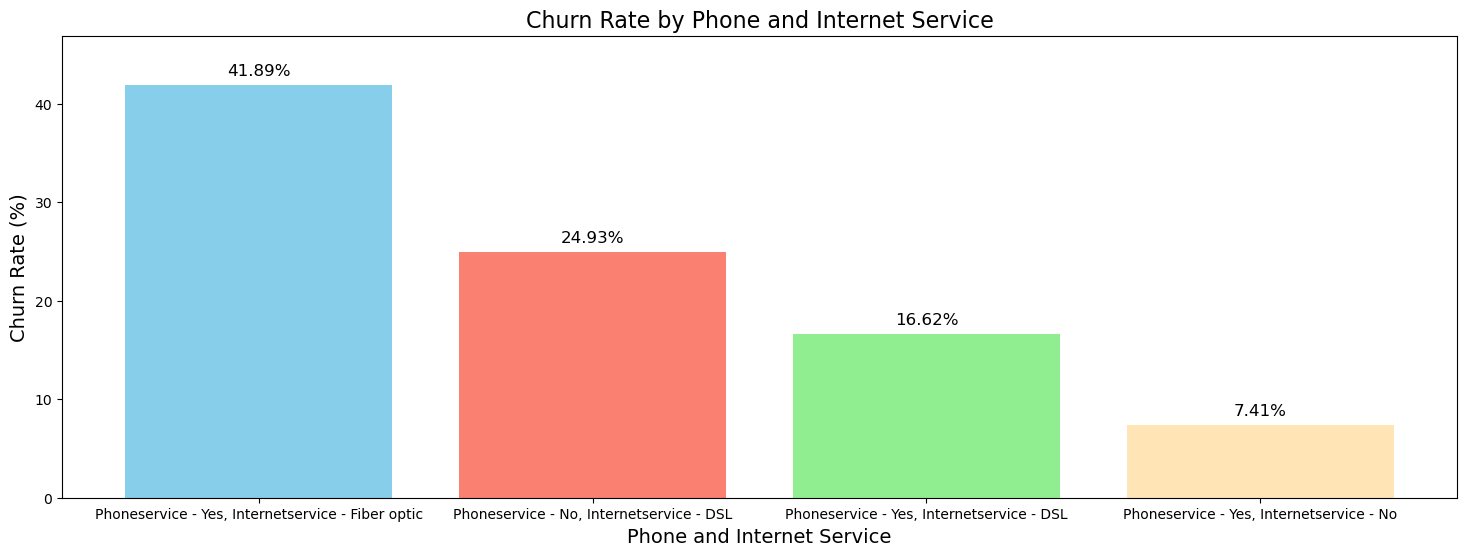

In [35]:
# Loading csvs
file_path_1 = 'analysis_files/phoneservice_churn_rate.csv'
phoneservice_churn_data = pd.read_csv(file_path_1)

file_path_2 = 'analysis_files/internetservice_churn_rate.csv'
internetservice_churn_data = pd.read_csv(file_path_2)

file_path_3 = 'analysis_files/phone_internetservice_churn_rate.csv'
phoneinternetservice_churn_data = pd.read_csv(file_path_3)

# Plotting churn rate by phone service
plt.figure(figsize=(8, 6))
plt.bar(phoneservice_churn_data['phoneservice'], phoneservice_churn_data['churn_rate'], color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Churn Rate by Phone Service', fontsize=16)
plt.xlabel('Phone Service', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(phoneservice_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(phoneservice_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


# Plotting churn rate by internet service
plt.figure(figsize=(8, 6))
plt.bar(internetservice_churn_data['internetservice'], internetservice_churn_data['churn_rate'], color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Churn Rate by Internet Service', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(internetservice_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(internetservice_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


# Plotting churn rate by  phone and internet service
plt.figure(figsize=(18, 6))
plt.bar('Phoneservice - '+phoneinternetservice_churn_data['phoneservice'] + ', Internetservice - '
        +phoneinternetservice_churn_data['internetservice'], 
        phoneinternetservice_churn_data['churn_rate'], color=['skyblue', 'salmon', 'lightgreen', 'moccasin'])

# Adding title and labels
plt.title('Churn Rate by Phone and Internet Service', fontsize=16)
plt.xlabel('Phone and Internet Service', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(phoneinternetservice_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(phoneinternetservice_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


### Gender and Churn
- Female customers have a slightly higher churn rate compared to male customers, indicating potential gender-specific factors influencing churn, however the difference is marginal which may indicate that gender has little effect on churn


### Partner Status and Churn
- **No Partner**: Customers without a partner have a significantly higher churn rate, indicating that having a partner might be a stabilizing factor.
- **With Partner**: Customers with a partner have a lower churn rate, suggesting they are more likely to stay with the service.

### Dependents and Churn
- **No Dependents**: Customers without dependents have a higher churn rate, indicating that having dependents might contribute to customer retention.
- **With Dependents**: Customers with dependents have a significantly lower churn rate, suggesting they are more likely to remain with the service.

### Combined Insights
- **No Partner, No Dependents**: This group has the highest churn rate, indicating that being single and without dependents is associated with higher churn.
- **With Partner, No Dependents**: Having a partner reduces churn, even without dependents.
- **No Partner, With Dependents**: Having dependents reduces churn, even without a partner.
- **With Partner, With Dependents**: This group has the lowest churn rate, indicating that having both a partner and dependents is associated with the highest customer retention.


The data indicates that `customers without a partner` and `without dependents` have the highest churn rates. Conversely, `customers with both a partner and dependents` have the lowest churn rates. Addressing the factors contributing to higher churn rates among single customers and those without dependents could significantly improve customer retention. Furthermore, more advertising towards customers with bot a partner and dependents could prove useful in further business endeavors



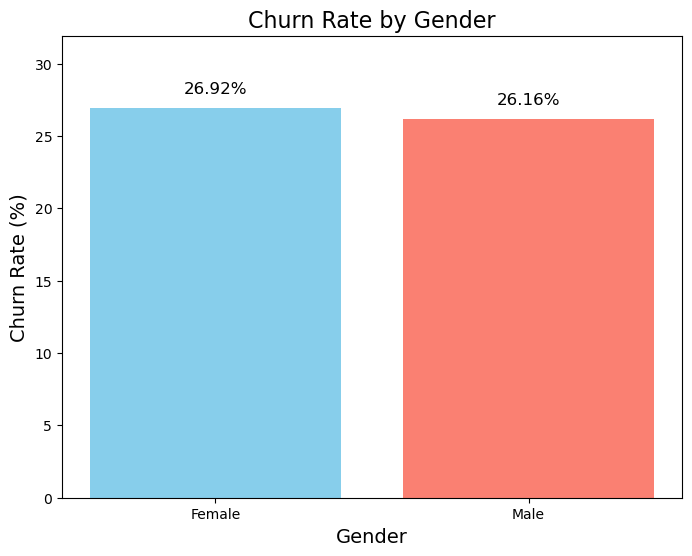

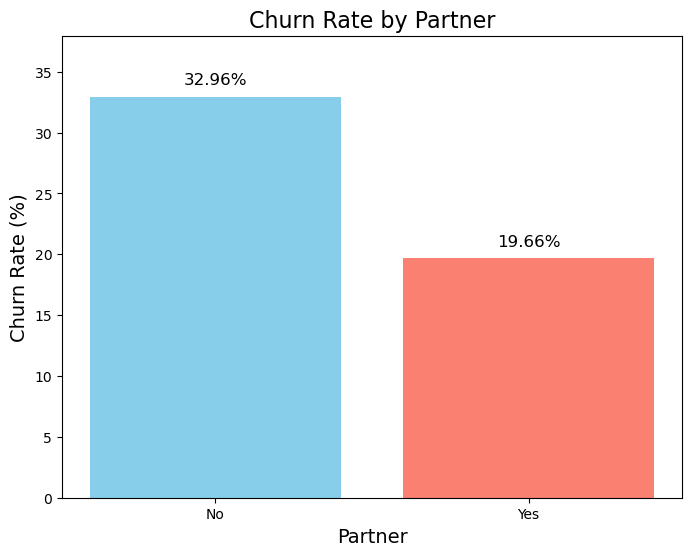

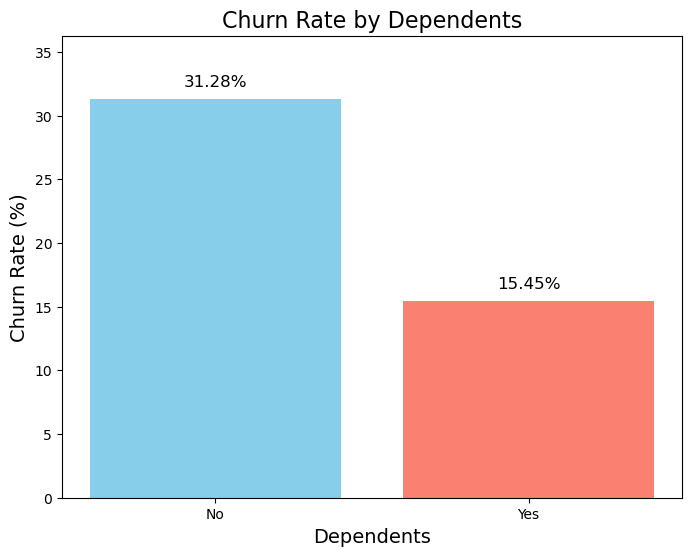

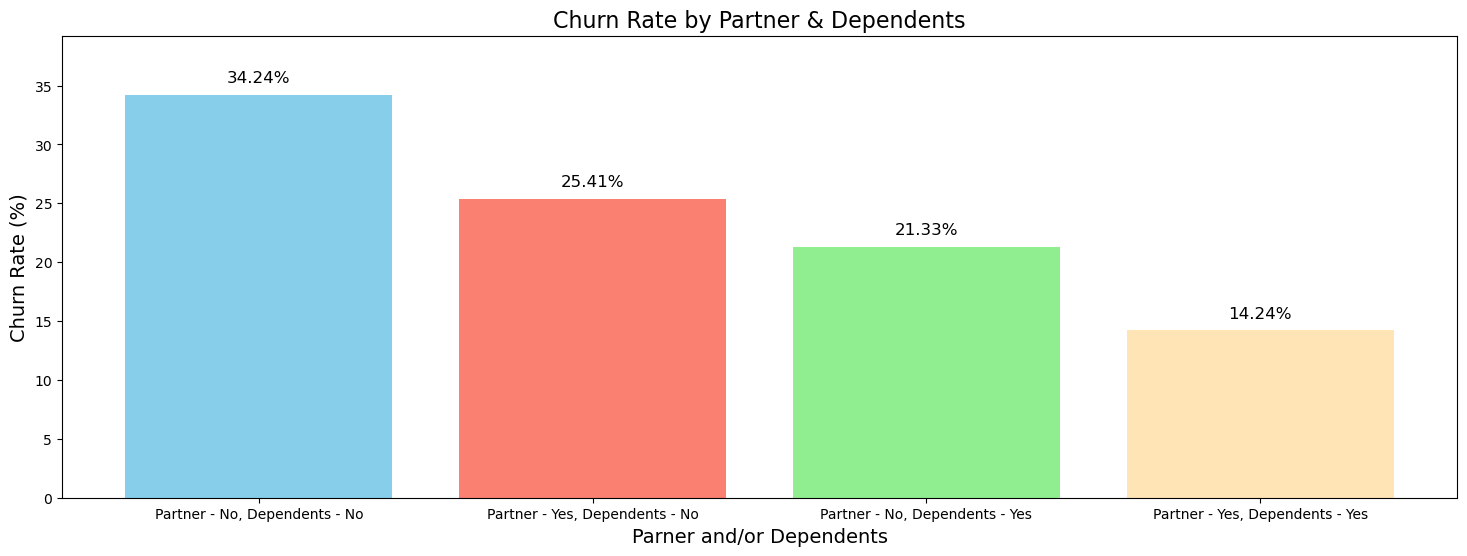

In [36]:
# Loading csvs
file_path_1 = 'analysis_files/gender_churn_rate.csv'
gender_churn_data = pd.read_csv(file_path_1)

file_path_2 = 'analysis_files/partner_churn_rate.csv'
partner_churn_data = pd.read_csv(file_path_2)

file_path_3 = 'analysis_files/dependents_churn_rate.csv'
dependents_churn_data = pd.read_csv(file_path_3)

file_path_4 = 'analysis_files/partner_dependents_churn_rate.csv'
partnerdependents_churn_data = pd.read_csv(file_path_4)



# Plotting the churn rate by gender
plt.figure(figsize=(8, 6))
plt.bar(gender_churn_data['gender'], gender_churn_data['churn_rate'], color=['salmon', 'skyblue'])

# Adding title and labels
plt.title('Churn Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(gender_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(gender_churn_data['churn_rate']):
  plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display the plot
plt.show()


# Plotting the churn rate by Partner
plt.figure(figsize=(8, 6))
plt.bar(partner_churn_data['partner'], partner_churn_data['churn_rate'], color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Churn Rate by Partner', fontsize=16)
plt.xlabel('Partner', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(partner_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(partner_churn_data['churn_rate']):
  plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display the plot
plt.show()


# Plotting the churn rate by Dependents
plt.figure(figsize=(8, 6))
plt.bar(dependents_churn_data['dependents'], dependents_churn_data['churn_rate'], color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Churn Rate by Dependents', fontsize=16)
plt.xlabel('Dependents', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(dependents_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(dependents_churn_data['churn_rate']):
  plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display the plot
plt.show()


# Plotting the churn rate by Partner and Dependents
plt.figure(figsize=(18, 6))
plt.bar('Partner - ' +partnerdependents_churn_data['partner'] + ', Dependents - ' 
+partnerdependents_churn_data['dependents'], partnerdependents_churn_data['churn_rate'], 
color=['skyblue', 'salmon', 'lightgreen', 'moccasin'])

# Adding title and labels
plt.title('Churn Rate by Partner & Dependents', fontsize=16)
plt.xlabel('Parner and/or Dependents', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(partnerdependents_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(partnerdependents_churn_data['churn_rate']):
  plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display the plot
plt.show()








### Charge Group and Churn
- **Medium-High Charge Group**: This group has the highest churn rate, indicating that customers in the medium-high charge range are more likely to leave. This could be due to perceived value not matching the cost.
- **High Charge Group**: The high charge group also has a significant churn rate, suggesting that higher charges might be a deterrent for customer retention.
- **Low-Medium Charge Group**: This group has a moderate churn rate, indicating better retention compared to higher charge groups.
- **Low Charge Group**: The low charge group has the lowest churn rate, suggesting that lower charges are associated with higher customer retention.

### How Charge Groups Were Deduced
To determine the charge groups, I used SQL queries to analyze the distribution of monthly charges and categorize them into different groups. For reference:

1. **Finding Charge Statistics**:
   - I calculated the maximum, minimum, mean, and specific percentiles (25th, 50th, and 75th) of the monthly charges using the following SQL query:
     ```sql
     SELECT
       MAX(monthlycharges) AS maximum_charge,
       MIN(monthlycharges) AS minimum_charge,
       AVG(monthlycharges) AS mean_charge,
       PERCENTILE_DISC(0.25) WITHIN group (ORDER BY monthlycharges) AS percentile_25,
       PERCENTILE_DISC(0.5) WITHIN group (ORDER BY monthlycharges) AS percentile_50,
       PERCENTILE_DISC(0.75) WITHIN group (ORDER BY monthlycharges) AS percentile_75
     FROM customer_info;
     ```
   - This query provided the following statistics:
     - **Maximum Charge**: $118.75
     - **Minimum Charge**: $18.25
     - **Mean Charge**: $64.76
     - **25th Percentile**: $35.5
     - **50th Percentile (Median)**: $70.35
     - **75th Percentile**: $89.85

2. **Categorizing Charges into Groups**:
   - Based on these statistics, you categorized the monthly charges into four groups using the following SQL query:
     ```sql
     SELECT 
       CASE 
         WHEN monthlycharges < 35.5 THEN 'Low'
         WHEN monthlycharges BETWEEN 35.5 AND 70.35 THEN 'Low-Medium'
         WHEN monthlycharges > 70.35 AND monthlycharges < 89.85 THEN 'Medium-High'
         ELSE 'High'
       END AS charge_group,
       COUNT(*) AS total_customers,
       SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
       ROUND((SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END) *1.0 / COUNT(*)) * 100, 3) AS churn_rate
     FROM 
       customer_info
     GROUP BY 
       charge_group
     ORDER BY 
       churn_rate DESC;
     ```
   - This query grouped the charges into:
     - **Low**: Charges below `$35.5`
     - **Low-Medium**: Charges between `$35.5` and `$70.35`
     - **Medium-High**: Charges between `$70.35` and `$89.85`
     - **High**: Charges above `$89.85`

###
The data indicates that `customers in the medium-high and high charge groups` have the highest churn rates. Conversely, `customers in the low charge group` have the lowest churn rate. This suggests that higher charges might be a significant factor contributing to customer churn. Addressing the factors that lead to higher churn rates in the medium-high and high charge groups, such as improving perceived value or offering better support, could significantly improve customer retention.

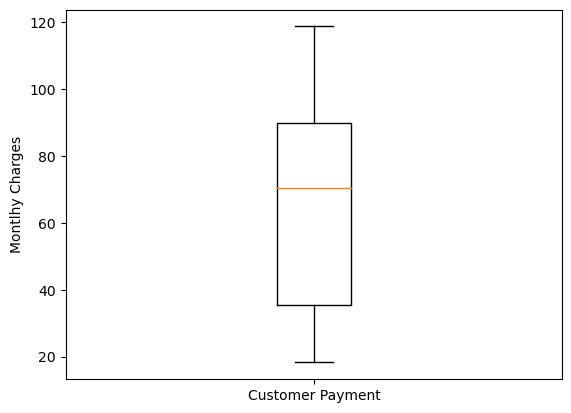

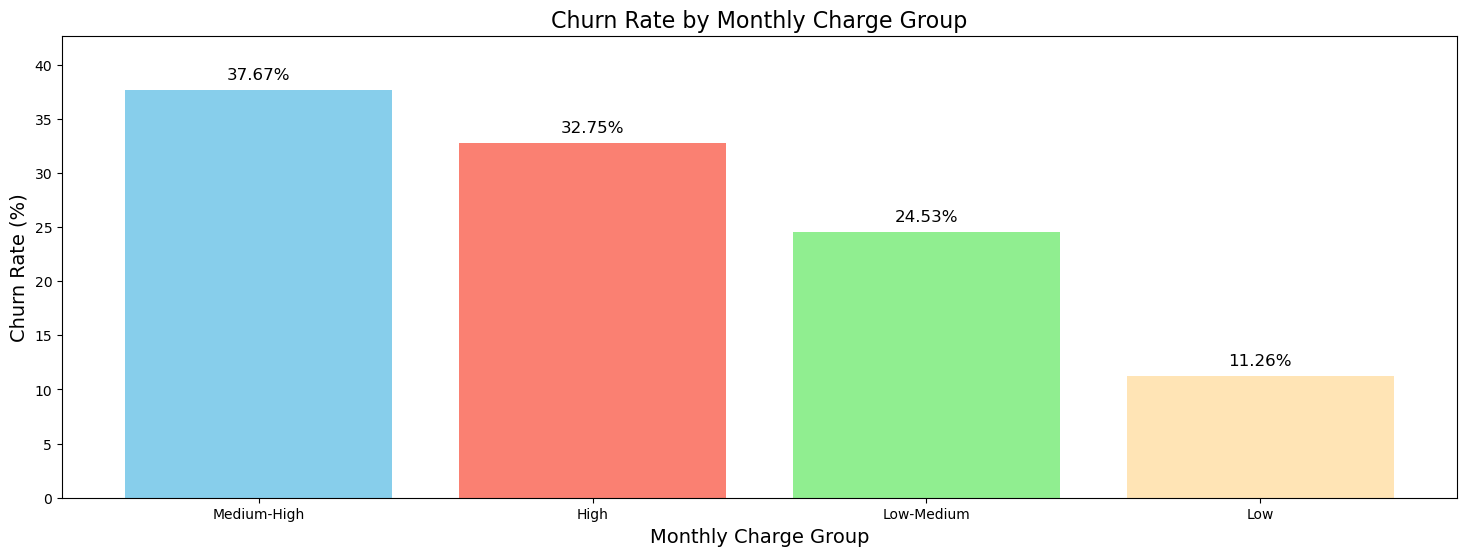

In [37]:
df = pd.read_json('analysis_files/monthly_charge_percentiles.json')
percentiles = {
    'label': "Customer Payment",
    'whislo': 18.25,    
    'q1': 35.5,        
    'med': 70.35,       
    'q3': 89.85,        
    'whishi': 118.75,    
    'fliers': []     
}

fig, ax = plt.subplots()
ax.bxp([percentiles], showfliers=False)
ax.set_ylabel("Montlhy Charges")
plt.show()


# Load csv
file_path = 'analysis_files/monthly_charges_churn_rate.csv'
monthly_charges_churn_data = pd.read_csv(file_path)

# Plotting the churn rate by Monthly charge group
plt.figure(figsize=(18, 6))
plt.bar(monthly_charges_churn_data['charge_group'], monthly_charges_churn_data['churn_rate'], 
color=['skyblue', 'salmon', 'lightgreen', 'moccasin'])

# Adding title and labels
plt.title('Churn Rate by Monthly Charge Group', fontsize=16)
plt.xlabel('Monthly Charge Group', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(monthly_charges_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(monthly_charges_churn_data['churn_rate']):
  plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display the plot
plt.show()




### Churn Analysis
- **Customers Who Did Not Churn**: Customers who did not churn have lower average monthly charges and significantly higher average total charges and tenure. This suggests that lower monthly charges are associated with longer customer retention.
- **Customers Who Churned**: Customers who churned have higher average monthly charges but lower average total charges and tenure. This indicates that higher monthly charges might be a factor contributing to customer churn, and these customers tend to leave sooner.
- **Lower Monthly Charges**: Associated with longer tenure and higher total charges, leading to lower churn rates.
- **Higher Monthly Charges**: Associated with shorter tenure and lower total charges, leading to higher churn rates.

### Visualization Insights
- **Churn vs. Average Monthly Charge**: Shows that higher monthly charges correlate with higher churn rates.
- **Churn vs. Average Tenure**: Illustrates that customers who churn have shorter tenures.
- **Average Monthly Charge vs. Average Tenure**: Highlights that lower monthly charges are associated with longer tenures.

### Recommendations
To reduce churn, we can consider strategies such as:
- **Adjusting Pricing**: Offering more competitive pricing or discounts to customers with higher monthly charges.
- **Improving Value**: Enhancing the perceived value of services for customers paying higher charges to justify the cost.
- **Customer Engagement**: Implementing retention programs targeting customers with higher monthly charges to increase their tenure.


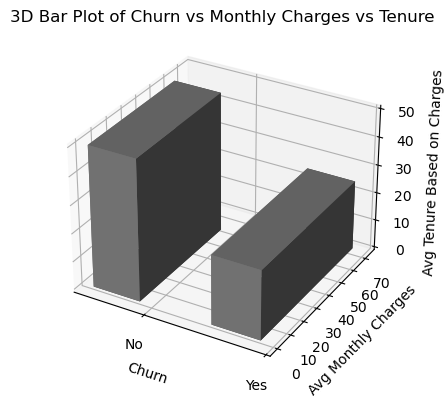

In [38]:

file_path = 'analysis_files/monthly_total_charges.csv'
monthly_charges_tenure_data = pd.read_csv(file_path)


# Create a 3D bar plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(3, 1, (1, 2), projection='3d')

# Define the variables
x = [0, 1]
y = np.zeros(len(x))
z = np.zeros(len(x))
dx = np.ones(len(x))*0.4
dy = monthly_charges_tenure_data["avg_monthly_charges"] - 2
dz = monthly_charges_tenure_data["avg_tenure_based_on_charges"] * 1.2

# Plotting the bars
ax.bar3d( x, y, z, dx, dy, dz, color = 'grey')

# Labels and title
ax.set_xlabel('Churn')
ax.set_ylabel('Avg Monthly Charges')
ax.set_zlabel('Avg Tenure Based on Charges')
ax.set_title('3D Bar Plot of Churn vs Monthly Charges vs Tenure')

ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['No', 'Yes'])


plt.show()




### Service Count and Churn
- **1 Service**: Customers using only one service have a relatively low churn rate, suggesting they might be satisfied with the single service they are using.
- **2 Services**: The churn rate increases significantly for customers using two services, indicating potential dissatisfaction or issues with the combination of services.
- **3 Services**: This group has the highest churn rate, suggesting that customers using three services are the most likely to leave, possibly due to complexity or dissatisfaction with multiple services.
- **4 - 9 Services**: The churn rate starts to decrease with customers using nine services having the lowest churn rate, suggesting the highest satisfaction or value perception among all groups.

### Insights
The data indicates a clear relationship between the number of services used and churn rates:
- **Low Service Count (1-2 Services)**: Lower churn rates for single service users, but a significant increase for two services.
- **Medium Service Count (3-5 Services)**: High churn rates, peaking at three services, then gradually decreasing.
- **High Service Count (6-9 Services)**: Lower churn rates, with the lowest churn rate for customers using nine services.

### Recommendations
To reduce churn, we can consider strategies such as:
- **Improving Service Bundling**: Enhance the value and satisfaction of service combinations, especially for customers using two to four services.
- **Customer Support**: Provide targeted support for customers using multiple services to address potential issues and improve satisfaction.
- **Incentives for Multi-Service Users**: Offer incentives or discounts for customers using multiple services to increase retention.



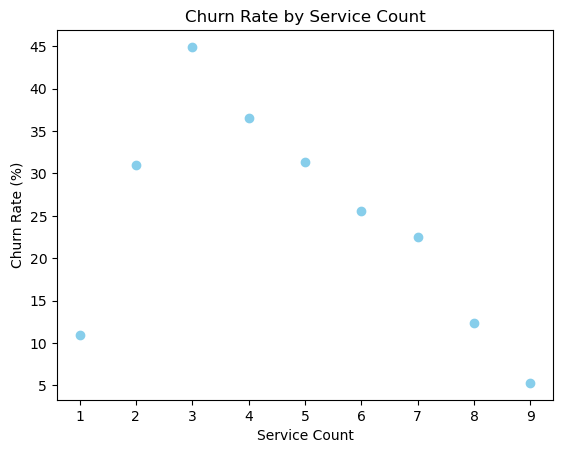

In [39]:
# Load csv
file_path = 'analysis_files/multi_service_churn_rate.csv'
multi_service_churn_data = pd.read_csv(file_path)

# Plot data
plt.scatter(multi_service_churn_data['service_count'], multi_service_churn_data['churn_rate'],
             color='skyblue', marker='o') 
plt.xlabel('Service Count')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Service Count')
plt.show()


### Paperless Billing and Churn
- **With Paperless Billing**: Customers using paperless billing have a higher churn rate, suggesting potential issues with the convenience or satisfaction of this billing method.
- **Without Paperless Billing**: Customers not using paperless billing have a significantly lower churn rate, indicating they might prefer traditional billing methods.

### Payment Method and Churn
- **Electronic Check**: This payment method has the highest churn rate, suggesting dissatisfaction or issues with electronic check payments.
- **Mailed Check**: Mailed check payments have a moderate churn rate, indicating better retention compared to electronic checks.
- **Bank Transfer (Automatic)**: Automatic bank transfers have a lower churn rate, suggesting higher satisfaction with this payment method.
- **Credit Card (Automatic)**: Automatic credit card payments have the lowest churn rate, indicating the highest satisfaction among payment methods.

### Combined Insights
- **Paperless Billing with Electronic Check**: This combination has the highest churn rate, indicating significant issues with both paperless billing and electronic check payments.
- **Paperless Billing with Mailed Check**: This combination has a moderate churn rate, suggesting some dissatisfaction with paperless billing despite using mailed checks.
- **Paperless Billing with Bank Transfer (Automatic)**: This combination has a lower churn rate, indicating better retention with automatic bank transfers.
- **Paperless Billing with Credit Card (Automatic)**: This combination has a relatively low churn rate, suggesting higher satisfaction with automatic credit card payments.
- **No Paperless Billing with Electronic Check**: This combination has a high churn rate, indicating issues with electronic check payments despite not using paperless billing.
- **No Paperless Billing with Mailed Check**: This combination has a lower churn rate, suggesting better retention with traditional billing and mailed checks.
- **No Paperless Billing with Bank Transfer (Automatic)**: This combination has a low churn rate, indicating high satisfaction with automatic bank transfers and traditional billing.
- **No Paperless Billing with Credit Card (Automatic)**: This combination has the lowest churn rate, suggesting the highest satisfaction with automatic credit card payments and traditional billing.

### Insights
The data indicates that `customers using paperless billing` and `electronic check payments` have the highest churn rates. Conversely, `customers not using paperless billing` and `using automatic credit card payments` have the lowest churn rates. Addressing the factors contributing to higher churn rates in paperless billing and electronic check payments could significantly improve customer retention.


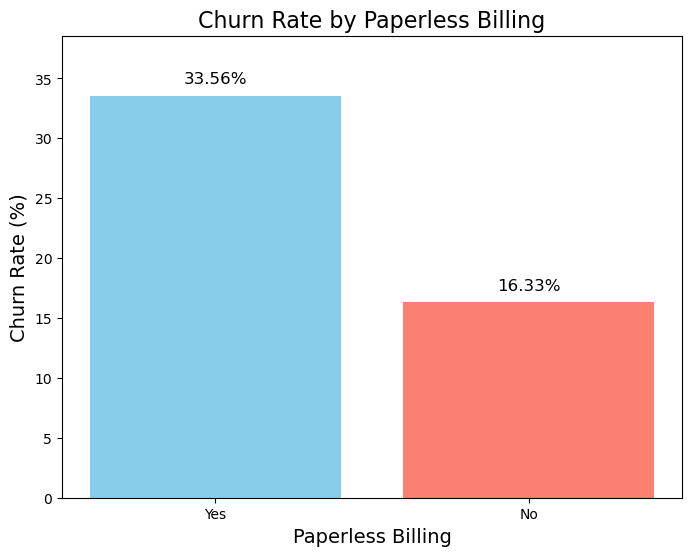

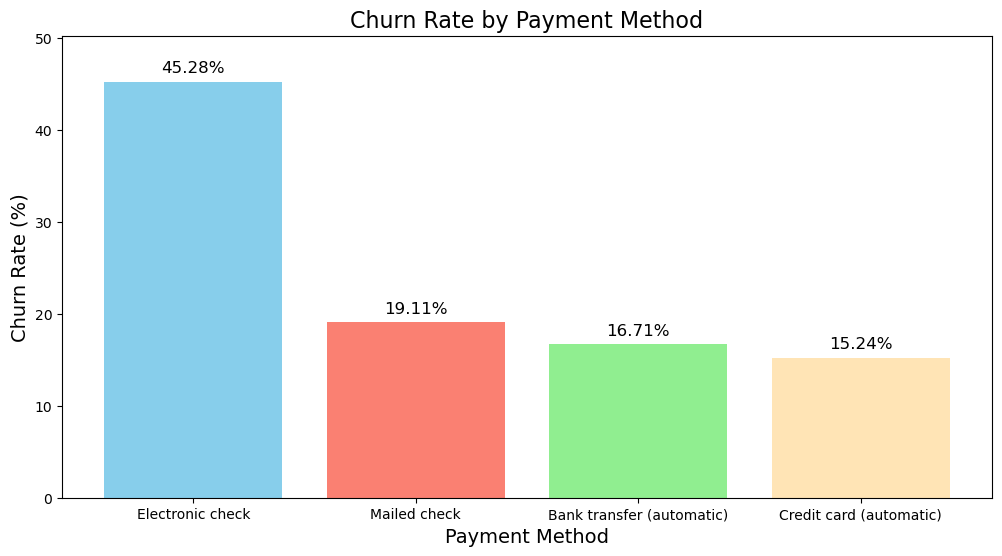

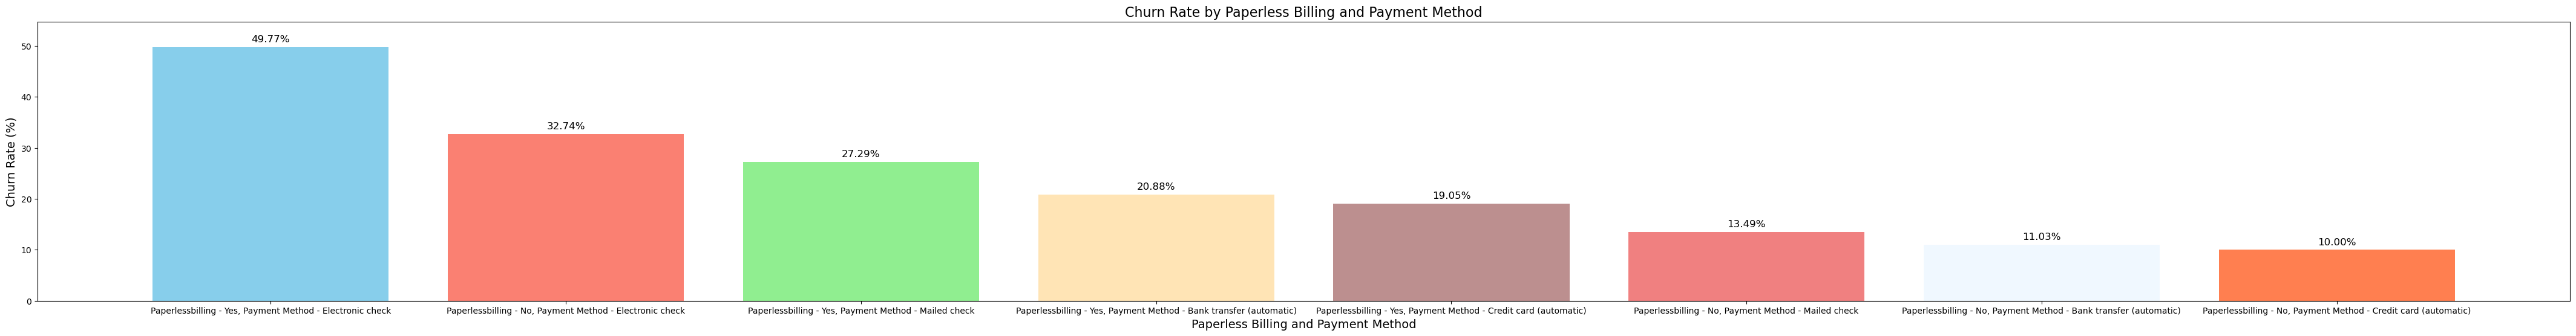

In [40]:
# Loading csvs
file_path_1 = 'analysis_files/paperless_billing_churn_rate.csv'
paperless_billing_churn_data = pd.read_csv(file_path_1)

file_path_2 = 'analysis_files/payment_method_churn_rate.csv'
payment_method_churn_data = pd.read_csv(file_path_2)

file_path_3 = 'analysis_files/payment_paperless_churn_rate.csv'
payment_paperless_churn_data = pd.read_csv(file_path_3)

# Plotting churn rate by paperless billing
plt.figure(figsize=(8, 6))
plt.bar(paperless_billing_churn_data['paperlessbilling'], paperless_billing_churn_data['churn_rate'], color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Churn Rate by Paperless Billing', fontsize=16)
plt.xlabel('Paperless Billing', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(paperless_billing_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(paperless_billing_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


# Plotting churn rate by internet service
plt.figure(figsize=(12, 6))
plt.bar(payment_method_churn_data['paymentmethod'], payment_method_churn_data['churn_rate'], 
        color=['skyblue', 'salmon', 'lightgreen', 'moccasin'])

# Adding title and labels
plt.title('Churn Rate by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(payment_method_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(payment_method_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


# Plotting churn rate by  phone and internet service
plt.figure(figsize=(54, 6))
plt.bar('Paperlessbilling - '+payment_paperless_churn_data['paperlessbilling'] + ', Payment Method - '
        +payment_paperless_churn_data['paymentmethod'], 
        payment_paperless_churn_data['churn_rate'], color=['skyblue', 'salmon', 
        'lightgreen', 'moccasin', 'rosybrown', 'lightcoral', 'aliceblue', 'coral'])

# Adding title and labels
plt.title('Churn Rate by Paperless Billing and Payment Method', fontsize=16)
plt.xlabel('Paperless Billing and Payment Method', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(payment_paperless_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(payment_paperless_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()

Based on the provided CSV data, here are the key insights regarding customer churn based on streaming TV and streaming movies:

### Streaming TV and Churn
- **No Streaming TV**: Customers without streaming TV have a higher churn rate, suggesting that the absence of streaming TV might be a factor in their decision to leave.
- **With Streaming TV**: Customers with streaming TV have a slightly lower churn rate, indicating that streaming TV might contribute to customer retention.
- **No Internet Service**: Customers without internet service have the lowest churn rate, likely due to fewer service-related issues.

### Streaming Movies and Churn
- **No Streaming Movies**: Customers without streaming movies have a higher churn rate, suggesting that the absence of streaming movies might be a factor in their decision to leave.
- **With Streaming Movies**: Customers with streaming movies have a slightly lower churn rate, indicating that streaming movies might contribute to customer retention.
- **No Internet Service**: Customers without internet service have the lowest churn rate, likely due to fewer service-related issues.

### Combined Insights
- **No Streaming TV, No Streaming Movies**: This group has the highest churn rate, indicating that the absence of both streaming TV and movies is associated with higher churn.
- **With Streaming TV, No Streaming Movies**: This combination has a slightly lower churn rate, suggesting that streaming TV alone might help retain some customers.
- **No Streaming TV, With Streaming Movies**: This combination also has a slightly lower churn rate, indicating that streaming movies alone might help retain some customers.
- **With Streaming TV and Movies**: This group has the lowest churn rate among those with internet service, suggesting that having both streaming TV and movies is associated with better customer retention.
- **No Internet Service**: This group consistently has the lowest churn rate, likely due to fewer service-related issues.

### Insights
The data indicates that `customers without streaming TV and movies` have the highest churn rates. Conversely, `customers with both streaming TV and movies` have the lowest churn rates among those with internet service. This suggests that offering both streaming TV and movies can significantly improve customer retention. Addressing the factors contributing to higher churn rates among customers without these services could further enhance retention.

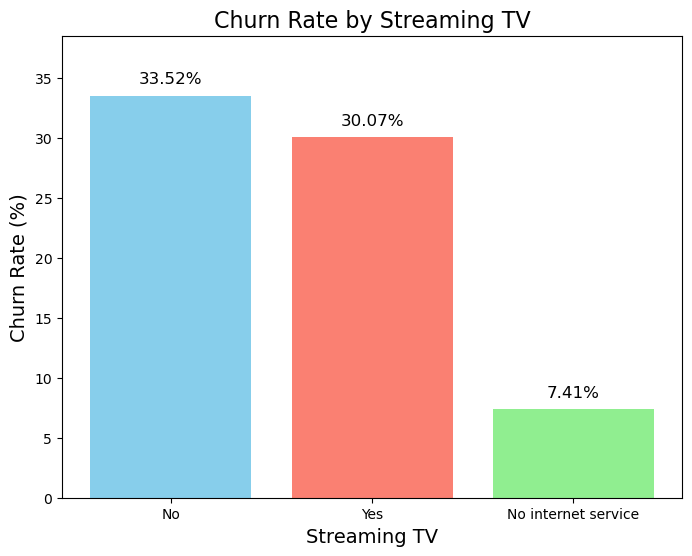

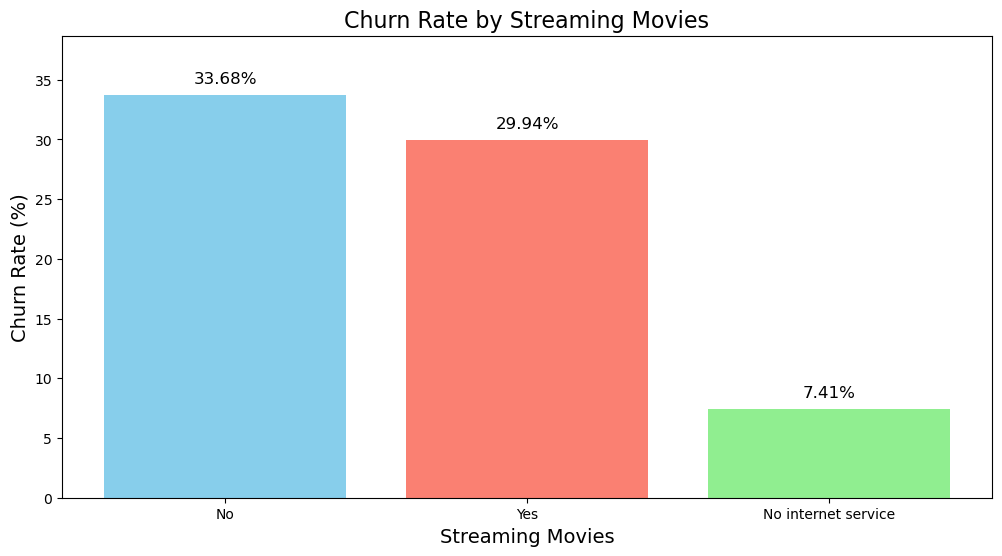

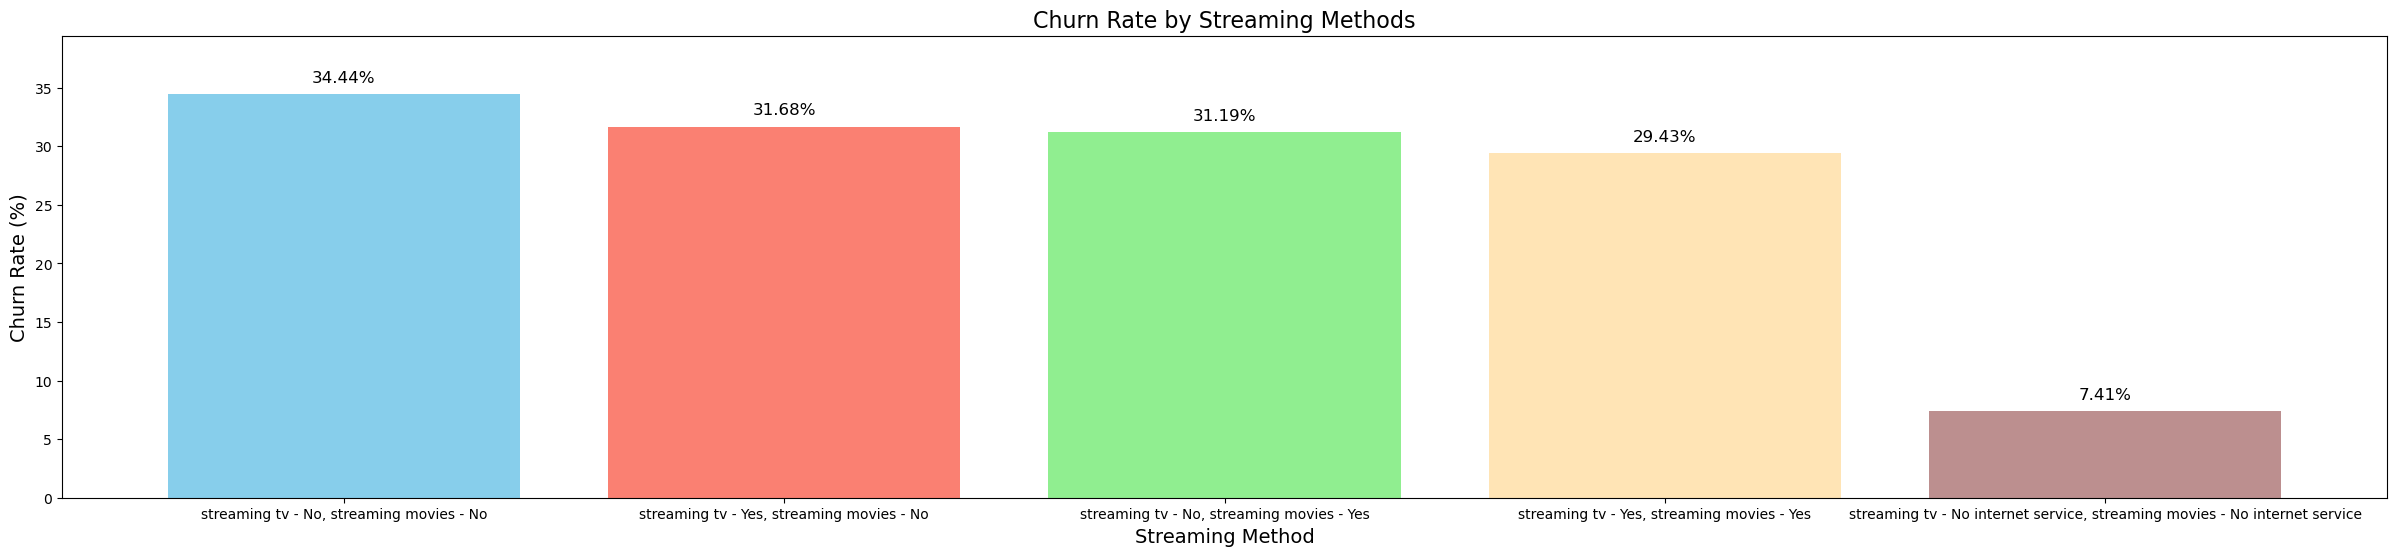

In [41]:
# Loading csvs
file_path_1 = 'analysis_files/streaming_tv_churn_rate.csv'
streaming_tv_churn_data = pd.read_csv(file_path_1)

file_path_2 = 'analysis_files/streaming_movies_churn_rate.csv'
streaming_movies_churn_data = pd.read_csv(file_path_2)

file_path_3 = 'analysis_files/streaming_churn_rate.csv'
streaming_churn_data = pd.read_csv(file_path_3)

# Plotting churn rate by streaming tv
plt.figure(figsize=(8, 6))
plt.bar(streaming_tv_churn_data['streamingtv'], streaming_tv_churn_data['churn_rate'], color=['skyblue', 'salmon', 'lightgreen'])

# Adding title and labels
plt.title('Churn Rate by Streaming TV', fontsize=16)
plt.xlabel('Streaming TV', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(streaming_tv_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(streaming_tv_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


# Plotting churn rate by streaming movies
plt.figure(figsize=(12, 6))
plt.bar(streaming_movies_churn_data['streamingmovies'], streaming_movies_churn_data['churn_rate'], 
        color=['skyblue', 'salmon', 'lightgreen'])

# Adding title and labels
plt.title('Churn Rate by Streaming Movies', fontsize=16)
plt.xlabel('Streaming Movies', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(streaming_movies_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(streaming_movies_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()


# Plotting churn rate by streaming services
plt.figure(figsize=(30, 6))
plt.bar('streaming tv - '+streaming_churn_data['streamingtv'] + ', streaming movies - '
        +streaming_churn_data['streamingmovies'], 
        streaming_churn_data['churn_rate'], color=['skyblue', 'salmon', 
        'lightgreen', 'moccasin', 'rosybrown'])

# Adding title and labels
plt.title('Churn Rate by Streaming Methods', fontsize=16)
plt.xlabel('Streaming Method', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(streaming_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(streaming_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()

### Tenure Group and Churn
- **0-1 Year**: Customers in their first year have the highest churn rate, indicating that new customers are more likely to leave. This suggests potential issues with initial customer satisfaction or onboarding processes.
- **1-2 Years**: The churn rate decreases significantly after the first year, indicating that customers who stay beyond the first year are more likely to remain.
- **2+ Years**: Customers with a tenure of more than two years have the lowest churn rate, suggesting that long-term customers are the most loyal.

### Contract Type and Tenure Group Churn
1. **Month-to-Month Contracts**:
   - **0-1 Year**:
     - **Churn Rate**: 51.354%
     - **Insight**: Month-to-month customers in their first year have the highest churn rate, indicating significant dissatisfaction or lack of commitment.
   - **1-2 Years**:
     - **Churn Rate**: 37.720%
     - **Insight**: The churn rate decreases but remains high, suggesting ongoing issues with month-to-month contracts.
   - **2+ Years**:
     - **Churn Rate**: 30.857%
     - **Insight**: The churn rate is lower for long-term month-to-month customers but still relatively high compared to other contract types.

2. **One-Year Contracts**:
   - **0-1 Year**:
     - **Churn Rate**: 10.484%
     - **Insight**: One-year contracts in the first year have a low churn rate, indicating better retention compared to month-to-month contracts.
   - **1-2 Years**:
     - **Churn Rate**: 8.122%
     - **Insight**: The churn rate decreases further, suggesting strong retention for one-year contracts.
   - **2+ Years**:
     - **Churn Rate**: 11.892%
     - **Insight**: The churn rate remains low for long-term one-year contract customers, indicating high satisfaction.

3. **Two-Year Contracts**:
   - **0-1 Year**:
     - **Churn Rate**: 0.000%
     - **Insight**: Two-year contracts in the first year have no churn, indicating very high retention.
   - **1-2 Years**:
     - **Churn Rate**: 0.000%
     - **Insight**: The churn rate remains at zero, suggesting excellent retention for two-year contracts.
   - **2+ Years**:
     - **Churn Rate**: 3.123%
     - **Insight**: The churn rate is very low for long-term two-year contract customers, indicating the highest satisfaction and retention.

### Insights
The data indicates that `customers in their first year` have the highest churn rates, especially those on `month-to-month contracts`. Conversely, `customers with two-year contracts` have the lowest churn rates across all tenure groups, indicating the highest satisfaction and retention. Addressing the factors contributing to higher churn rates among new customers and those on month-to-month contracts could significantly improve customer retention.


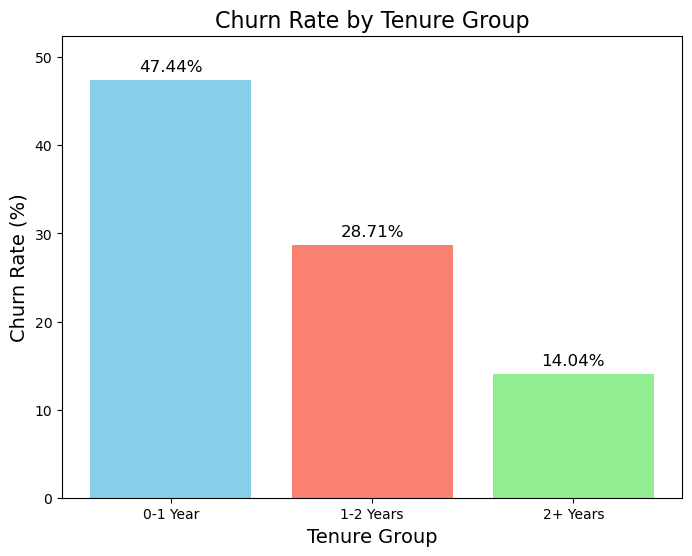

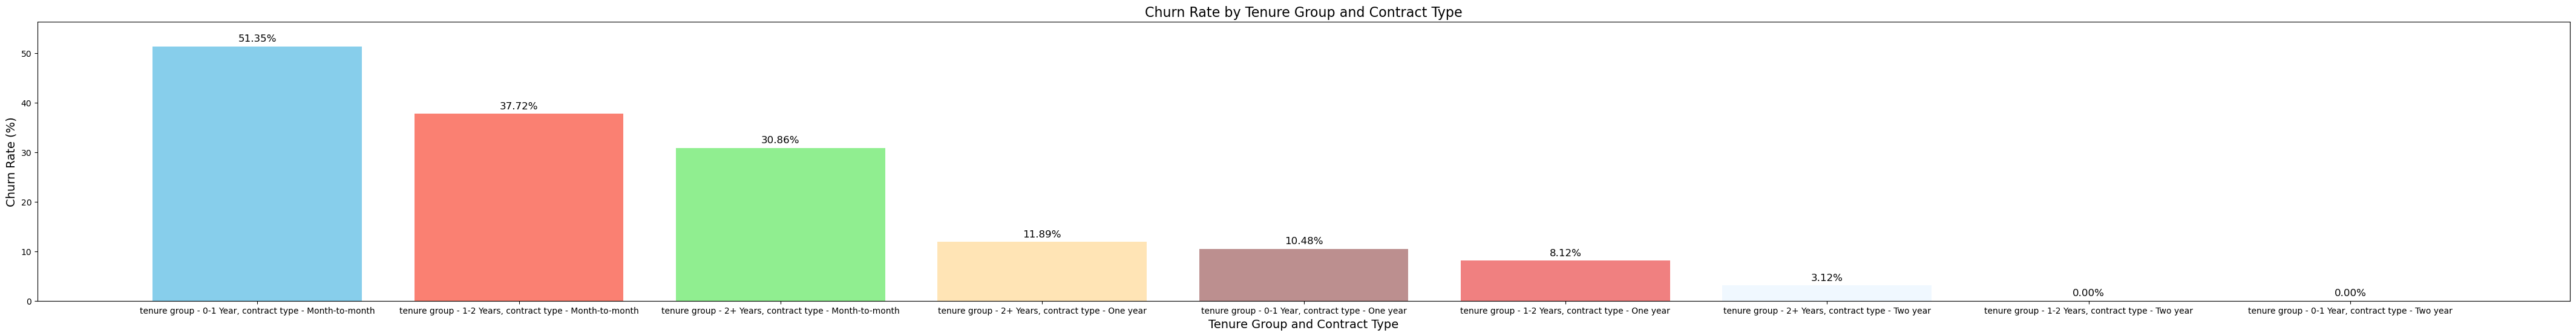

In [42]:
# Loading csvs
file_path_1 = 'analysis_files/tenure_churn_rate.csv'
tenure_churn_data = pd.read_csv(file_path_1)

file_path_2 = 'analysis_files/tenure_contract_churn_rate.csv'
tenure_contract_churn_data = pd.read_csv(file_path_2)

# Plotting churn rate by tenure group
plt.figure(figsize=(8, 6))
plt.bar(tenure_churn_data['tenure_group'], tenure_churn_data['churn_rate'], color=['skyblue', 'salmon', 'lightgreen'])

# Adding title and labels
plt.title('Churn Rate by Tenure Group', fontsize=16)
plt.xlabel('Tenure Group', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(tenure_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(tenure_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()



# Plotting churn rate by tenure group and contract type
plt.figure(figsize=(54, 6))
plt.bar('tenure group - '+tenure_contract_churn_data['tenure_group'] + ', contract type - '
        +tenure_contract_churn_data['contract'], 
        tenure_contract_churn_data['churn_rate'], color=['skyblue', 'salmon', 
        'lightgreen', 'moccasin', 'rosybrown', 'lightcoral', 'aliceblue', 'coral', 'lavender'])

# Adding title and labels
plt.title('Churn Rate by Tenure Group and Contract Type', fontsize=16)
plt.xlabel('Tenure Group and Contract Type', fontsize=14)
plt.ylabel('Churn Rate (%)', fontsize=14)
plt.ylim(0, max(tenure_contract_churn_data['churn_rate']) + 5)

# Adding text labels on the bars
for index, value in enumerate(tenure_contract_churn_data['churn_rate']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', fontsize=12)

# Display plot
plt.show()

### Analysis of Churn Risk Based on Tenure and Monthly Charges

To analyze the risk of customer churn based on tenure and monthly charges, I used a series of SQL queries to extract and categorize the relevant data. Here’s a detailed breakdown of the analysis and the SQL queries used, along with an explanation of why this approach is effective:

#### Step 1: Extracting Tenure and Monthly Charges for Churned Customers
First, I extracted the tenure and monthly charges for customers who have churned:
```sql
WITH tenure_charge_churn AS (
  SELECT 
    tenure,
    MonthlyCharges,
    churn
  FROM 
    customer_info
  WHERE churn = 'Yes'
  ORDER BY 
    monthlycharges, tenure
)
```
This query creates a temporary table (`tenure_charge_churn`) containing the tenure and monthly charges of customers who have churned. This step is crucial because it isolates the data of interest, allowing for focused analysis on churned customers.

#### Step 2: Calculating Averages for Different Tenure Groups
Next, I calculated the average monthly charges for different tenure groups:
```sql
WITH tenure_charge_averages AS (
  SELECT
    tenure,
    COUNT(tenure) AS tenure_count,
    AVG(monthlycharges) AS average_monthly_charge
  FROM tenure_charge_churn
  GROUP BY
    tenure
  ORDER BY
    tenure, tenure_count DESC
)
```
Based on these averages and the tenure count of each month, I was able to deduce
which months were cutoffs for changes in numbers of tenured customers.

```sql
SELECT
  '1-10_months' AS tenure_length,
  ROUND(AVG(average_monthly_charge), 3) AS avg_monthly_charge,
  ROUND(MIN(average_monthly_charge), 3) AS min_monthly_charge,
  ROUND(MAX(average_monthly_charge), 3) AS max_monthly_charge
FROM
  tenure_charge_averages
WHERE
  tenure <= 10

UNION

SELECT
  '11-25_months' AS tenure_length,
  ROUND(AVG(average_monthly_charge), 3) AS avg_monthly_charge,
  ROUND(MIN(average_monthly_charge), 3) AS min_monthly_charge,
  ROUND(MAX(average_monthly_charge), 3) AS max_monthly_charge
FROM
  tenure_charge_averages
WHERE
  tenure BETWEEN 11 AND 25

UNION

SELECT
  '26-44_months' AS tenure_length,
  ROUND(AVG(average_monthly_charge), 3) AS avg_monthly_charge,
  ROUND(MIN(average_monthly_charge), 3) AS min_monthly_charge,
  ROUND(MAX(average_monthly_charge), 3) AS max_monthly_charge
FROM
  tenure_charge_averages
WHERE
  tenure BETWEEN 26 AND 44;
```
This query calculates the average, minimum, and maximum monthly charges for customers in different tenure groups (1-10 months, 11-25 months, and 26-44 months). This step is effective because it provides a clear understanding of how monthly charges vary across different tenure lengths, which is essential for identifying patterns and trends.

#### Step 3: Predicting Churn Risk
Finally, I predicted the likelihood of churn based on tenure and monthly charges from earlier queries:
```sql
SELECT 
  tenure,
  MonthlyCharges,
  churn,
  CASE 
    WHEN churn = 'Yes' THEN 'Likely to churn'
    WHEN tenure <= 10 AND MonthlyCharges > 71 THEN 'High Risk'
    WHEN tenure <= 25 AND MonthlyCharges BETWEEN 58 AND 89 THEN 'Moderate Risk'
    ELSE 'Low Risk'
  END AS churn_risk
FROM 
    customer_info
ORDER BY 
    churn_risk DESC, tenure DESC, MonthlyCharges DESC;
```
This query categorizes customers into different risk levels based on their tenure and monthly charges:
- **High Risk**: Customers with tenure ≤ 10 months and monthly charges > $71.
- **Moderate Risk**: Customers with tenure ≤ 25 months and monthly charges between $58 and $89.
- **Low Risk**: All other customers.

### Approach to Analysis
1. **Focused Data Extraction**: By isolating the data of churned customers, I ensure that the analysis is targeted and relevant. This helps in understanding the specific factors contributing to churn.

2. **Granular Insights**: Calculating averages for different tenure groups provides granular insights into how monthly charges impact churn across various stages of customer tenure. This helps in identifying specific periods where customers are more likely to churn.

3. **Risk Categorization**: Categorizing customers into different risk levels based on tenure and monthly charges allows for a nuanced understanding of churn risk. This enables targeted interventions to reduce churn, such as offering discounts or improving customer support for high-risk groups.

4. **Actionable Insights**: The analysis provides clear, actionable insights that can be used to develop strategies for improving customer retention. For example, identifying high-risk customers allows for proactive measures to address their concerns and reduce churn. The scatterplot reveals that many customers fall into the low to moderate risk categories for churn. However, there is also a significant number of customers who are likely to churn or are at high risk. Therefore, implementing strategies to mitigate these risks could be highly beneficial.


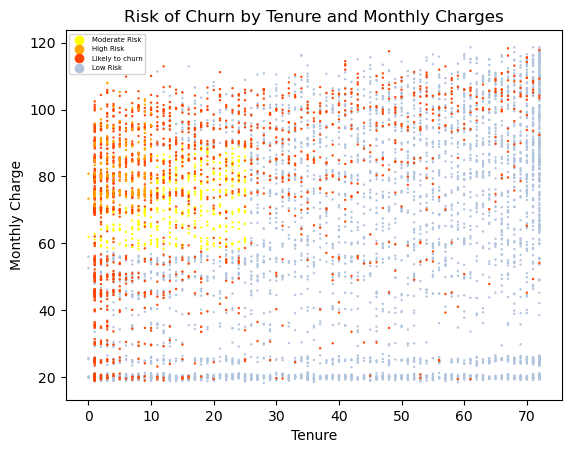

In [46]:
# Load csv
file_path = 'analysis_files/tenure_churn_risk.csv'
tenure_churn_risk = pd.read_csv(file_path)

color_mapping = {
    "Moderate Risk": 'yellow',
    "High Risk": 'orange',
    "Likely to churn": 'orangered',
    "Low Risk": 'lightsteelblue'
}

def risk_color(risk, mapping):
  return mapping[risk]
  
# Apply risk_color function to the 'churn_risk' column
colors = tenure_churn_risk['churn_risk'].apply(lambda risk: risk_color(risk, color_mapping))


# Plot data
plt.scatter(tenure_churn_risk['tenure'], tenure_churn_risk['monthlycharges'], s = 0.5,
             color=colors, marker='o') 
plt.xlabel('Tenure')
plt.ylabel('Monthly Charge')
plt.title('Risk of Churn by Tenure and Monthly Charges')

for risk, color in color_mapping.items():
    plt.scatter([], [], color=color, label=risk)  # Empty scatter points for legend
plt.legend(loc=2, prop={'size': 5})


plt.show()

